In [1]:
import os
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
rootpath = '/media/share/data/Tremella_fuciformis/'
pdpath = os.listdir(rootpath)
img_df = pd.DataFrame([], columns=['image_array', 'img_path', 'image_name'])

num = 0
for i, pdname in enumerate(pdpath):
    img_name = fnmatch.filter(os.listdir(os.path.join(rootpath, pdname)), '*.jpg')
    
    num = num + len(img_name)
#     for j, fname in enumerate(img_name):
        
            
print('All valid image file numeber :', num)

All valid image file numeber : 102


In [164]:
file = '/media/share/data/Tremella_fuciformis/T8-171027/image002.jpg'

In [167]:
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.segmentation import clear_border
from skimage.morphology import disk, closing
from skimage.filters import rank, sobel

# to grayscale
img = plt.imread(file)
img_g = rgb2gray(img)

# find edges
edges = canny(img_g, sigma=1.0,
              low_threshold=0.1, 
              high_threshold=0.5)

# find rois
mark = sobel(edges)
mask = np.zeros_like(mark)
mask[mark < 0] = 0
mask[mark > 0] = 1
rois = clear_border(mask, buffer_size=1)
c_rois = closing(rois, disk(16))

# mean filter
roi = rank.mean_bilateral(c_rois, selem=disk(81), s0=256, s1=256)
mean_filter = roi.mean()
roi[roi <= mean_filter] = 0
roi[roi > mean_filter] = 1

/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


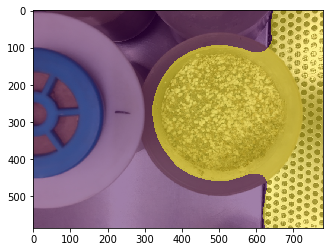

In [168]:
plt.figure()
plt.imshow(roi, alpha=1)
plt.imshow(img, alpha=0.5)